Projet Group 5:

Aanisha Newaz (100788588)
Japnit Ahuja (100790042) 
Islam Nuryyev(100778667) 
Jessica Patel (100785837) 

<a name="intro"></a>
# 1.	Introduction: Explain why you chose the topic, the questions you are interested in studying. List team members and a description of how each contributed to the project.

Having to choose a university after high school is difficult for most students because of the many options available. Everyone wants to get into the best universities in their country or the best countries in the world. The dataset World University Ranking helps us see what factors have the most impact on the university’s ranking which will help us in our future decision making when choosing a university for masters or PhD. It also allows us to see the quality of education and the influence of the institution overall. 

We found many datasets but some were particularly eye-catching and intriguing. A dataset called Data Science and Stem salaries was one that we found interesting as it pertains to our field. Another interesting dataset was Factors Affecting Campus Placement. As university students it is important to know what factors affect our campus placement. However we chose the World University Ranking dataset as it also had missing values in its data and we think it will be interesting to deal with missing data in our preprocessing. 

Questions and methods we are interested in studying. 

1. What effect does national rank have on the world ranking?  
2. What impact does quality of education have on publications and patents?
3. What attribute has the greatest effect/best relation with world ranking?
4. Are there certain attributes or qualities of an institution that have a greater impact on it’s ranking based on the year it was conducted (2012 - 2015)?
5. Are there different countries that value different qualities more in an institution? What countries (if any) do not align with the world wide trend in terms of the desired qualities?

- Have side by side comparison of each variable
- Find the Pearson correlation coefficient between institutes and different attributes to investigate the nature and strength of their relation
- Plot the attributes using a scatter plot to study the relationship using matplotlib in python
- calculate and plot the least squares best fit line to approximate the relationship

# 2.	Description of data: Describe the dataset, how was it collect, how you accessed it, references/credit to source. 

Chosen Dataset:
    https://www.kaggle.com/mylesoneill/world-university-rankings
    
Name of dataset: World University Rankings

The World University Rankings dataset collected by Myles O'Neill on www.kaggle.com is a dataset of ranked universities done by three different ranking institutes. For our analysis, we will be using the Center for World University Rankings (https://cwur.org/) dataset. This ranking list launched in 2012 in Saudi Arabia. 

The ranking list was formed from various different sources, including the Science Citation Index Expanded, Social Sciences Citation Index, and the Arts & Humanities Citation Index. These indexes were used to help sort universities based on different attributes.

This dataset has upto fourteen attributes to help determing the chosen ranking for each universities:

    1. World ranking
        World ranking for universities in order from year 2012 - 2015        
    2. Institution
        Name of institutions
    3. Country
        Country of institutions's location
    4. National ranking
        Institution's ranking within it's country of origin
    5. Quality of education
        Rank for quality of education
    6. Alumni employment
        Rank for alumni employment
    7. Quality of faculty
        Rank for quality of faculty
    8. Publications
        Rank for publications
    9. Influence
        Rank for influence
    10. Citations
        Number of students at the university
    11. Broad impact
        Rank for broad impact
    12. Patents
        Rank for patents
    13. Score
        Total score that's used for determining world rank of institution
    14. Year
        Year of ranking (2012 - 2015)

# 3. Analysis of the data: Provide a detailed, well-organized description of data quality, including the features, any data that should be cleaned or pre-processed before you EDA.

In [59]:
#importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('cwurData.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

df = pd.DataFrame(data);
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,,5,100,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,,15,89.5,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975,651,44.02,2015


# 4.	Exploratory Data Analysis: Provide a detailed, well-organized description of your findings, including textual description, graphs, and code. Your focus should be on both the results and the process. Include, as reasonable and relevant, approaches that didn’t work, challenges, the data cleaning process, etc.

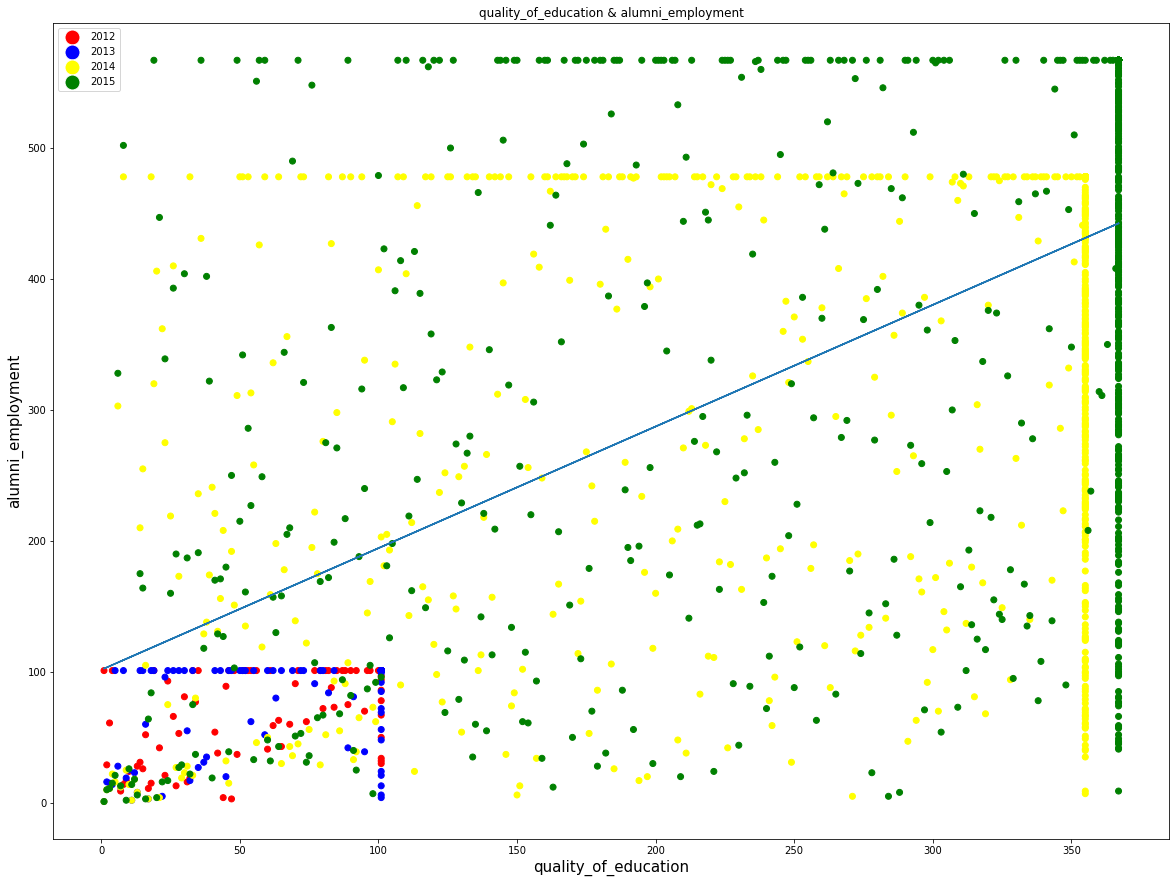

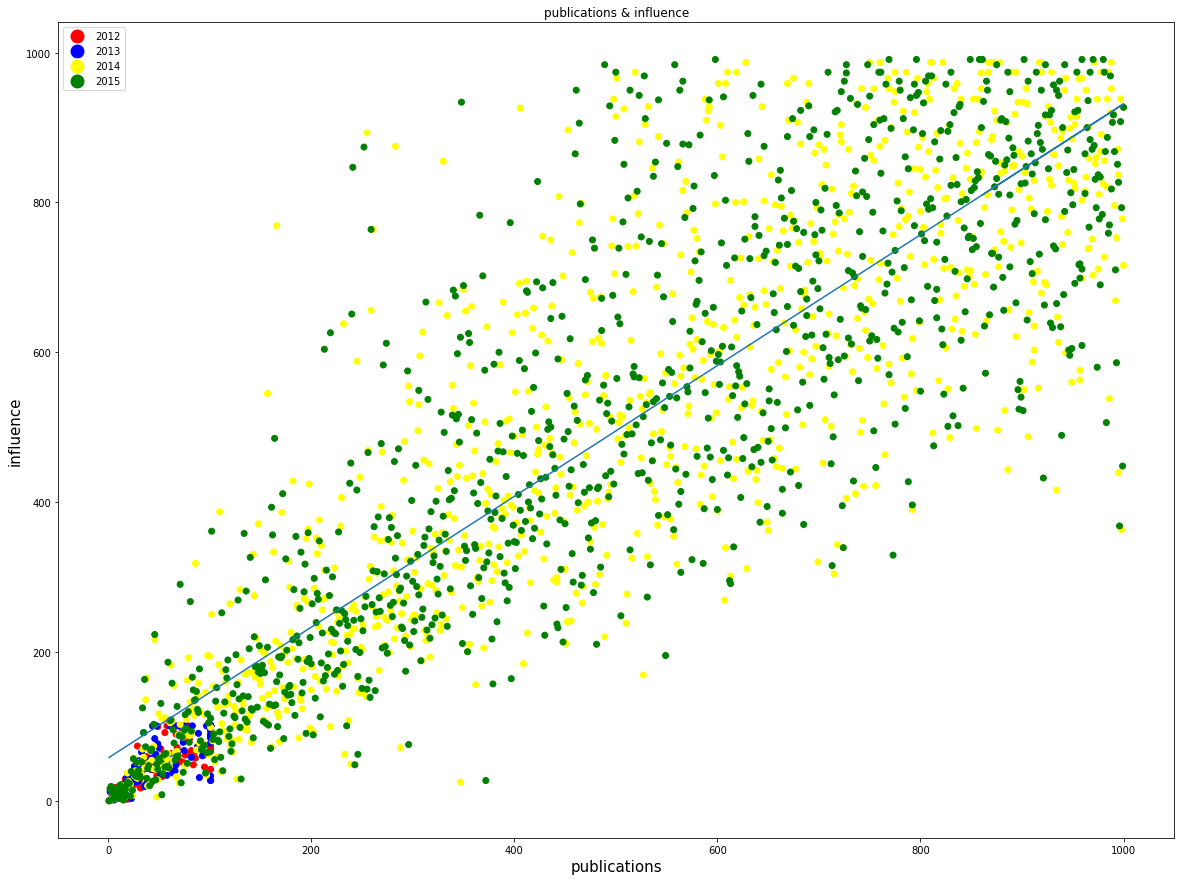

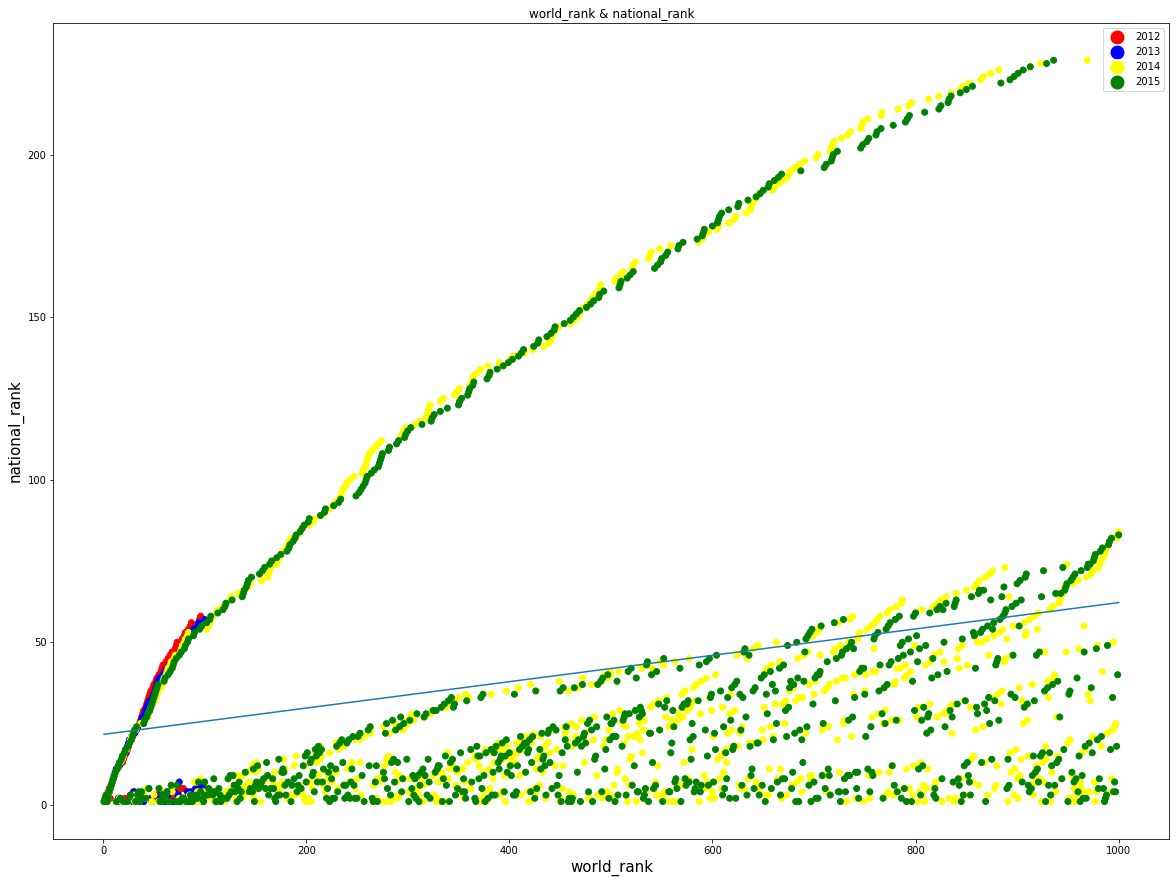

In [60]:
#the least squares best fit line to approximate the relationship
from matplotlib.lines import Line2D

def pltcolor(years):
    cols = []
    for year in years:
        if year == 2012:
            cols.append('red')
        elif year == 2013:
            cols.append('blue')
        elif year == 2014:
            cols.append('yellow')
        elif year == 2015:
             cols.append('green')
    return cols


def line(column1, column2):
    df[column1] = df[column1].astype('int64')
    df[column2] = df[column2].astype('int64')
    df['year'] = df['year'].astype('int64')
    
    quality_of_education = df[column1];
    alumni_employment = df[column2];
    years = df['year'];
    
    plt_1 = plt.figure(figsize=(20, 15));

    x = np.array(quality_of_education);
    y = np.array(alumni_employment);
    
    plt.title(column1 + " & " + column2)
    plt.xlabel(column1, fontsize=15)
    plt.ylabel(column2, fontsize=15)
    

    a, b = np.polyfit(x, y, 1);
    cols = pltcolor(years);
    plt.scatter(x, y, c = cols);
    plt.plot(x, a*x+b);
    
    
    custom_lines = [Line2D([0], [0], marker='o', color='w', label='2012',
                          markerfacecolor='r', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='2013',
                          markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='2014',
                          markerfacecolor='yellow', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='2015',
                          markerfacecolor='g', markersize=15)]
    
    plt.legend(handles=custom_lines)
    
    plt.show();
    

line('quality_of_education', 'alumni_employment');
line('publications', 'influence');
line('world_rank', 'national_rank');

#quality_of_education & alumni_employment
# The x-axis represents the quality of education, and the y-axis represents alumni employment.

# In this diagram we see that the spread is both on the x and y axes. 
# It means that there is no obvious relationship between a university ranking in the top by quality
# of education and higher alumni employment. 
# For example, in years 2014 and 2015, several universities can be ranked in the same place 
# by the quality of education, but can be placed in different ranks by alumni employment.




#publications & influence 
# The x-axis represents the number of publications, and the y-axis represents influence.

# What we can read from the diagram and the line of best-fit approximation is that 
# the higher in rankings of publications a university appears, the more influent it is.

# The dots are concentrated around values from 0 to 200 in both x and y axes.




# world_rank & national_rank
# The x-axis represents the world ranking, and the y-axis represents the national ranking.

# From the diagram we can see that the spread is wider on the x-axis(world rank). 
# From this, we can conclude that being ranked in the top 50 of universities is not correlated 
# to being ranked on the top of the world ranking.

# However, we can see that the dots are concentrated around the values from 0 to 50 on the y-axis.
# Many of the national top universities are ranked in top positions of world rankings.
# The combination of other variables has contributed to these universities being ranked on the top 
# of the world rankings. 

# 5.	Potential Data Science: Based on your data analysis and findings. Describe any potential ideas if you were to pursue a data science or machine learning project using this dataset. If you don’t find any potential, explain your rationale.

We can use this data to recommend a university based on the most important criteria for the prospective students. A student might be looking to find a university with the best rank for quality of education and publication or a student maybe looking to find a university with the best alumni employment. Thus, this data could be used to make recommendations to students based on different criteria. 

Universities also can use this dataset as a guideline to increase their ranks and the aspects they need to improve.This data could also be converted to a machine learning model for the prediction of the rank based on its attributes.Thus, an institute could get an approximate value of their ranking compared to others based on the previous trends.

# 6.	Conclusion: Discuss limitations and future directions, lessons learned, maybe things you did not predict to find out or things you learned as you performed the analysis